In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_nu_i = np.array([0.005, 0.01, 0.02])
vec_nu_label = ["5", "10", "20"]
vec_wI = np.array([0.1, 1, 10])
vec_wI_label = ["0.1", "1", "10"]
vec_alpha = np.linspace(0.01, 1, 100)

df_nu = pd.DataFrame({'alpha':vec_alpha,
					vec_nu_i[0]:np.zeros_like(vec_alpha),
					vec_nu_i[1]:np.zeros_like(vec_alpha),
					vec_nu_i[2]:np.zeros_like(vec_alpha)})

df_nu_wI = pd.DataFrame({'alpha':vec_alpha,
					vec_wI[0]:np.zeros_like(vec_alpha),
					vec_wI[1]:np.zeros_like(vec_alpha),
					vec_wI[2]:np.zeros_like(vec_alpha)})
		

In [3]:
n = 30000

for nu_i in vec_nu_i:
	print(nu_i, end='\t')
	for i, alpha in enumerate(vec_alpha):
		print(i, end=' ')
		model_type = mt.MFNMDA(alpha_val = alpha,
					EL_val = -60,
					EA_val = 0,
					EN_val = 0,
					EI_val = -80,
					nuA_val = nu_i,
					nuN_val = nu_i,
					nuI_val = nu_i,
					wA_val = 0.1,
					wN_val = 0.1,
					wI_val = 0.4,
					tauA_val = 1,
					tauN_val = 100,
					tauI_val = 10,
					KA_val = 400,
					KN_val = 400, 
					KI_val = 100,
					Vth_val= -50,
					Vr_val = -60,
					tauL_val = 20,
					tauR_val = 2,
					beta_val = 0.062,
					gamma_val = 3.57,
					n_Mg_val = 1
				)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[3]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[nu_i][i] = FP_model.calculate_firing_rate(vec_Vk)
	
	print()

0.005	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.01	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.02	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [4]:
n = 30000

for wI in vec_wI:
	print(wI, end='\t')
	for i, alpha in enumerate(vec_alpha):
		print(i, end=' ')
		model_type = mt.MFNMDA(alpha_val = alpha,
					EL_val = -60,
					EA_val = 0,
					EN_val = 0,
					EI_val = -80,
					nuA_val = 0.005,
					nuN_val = 0.005,
					nuI_val = 0.005,
					wA_val = 0.5,
					wN_val = 0.5,
					wI_val = wI,
					tauA_val = 1,
					tauN_val = 100,
					tauI_val = 10,
					KA_val = 400,
					KN_val = 400, 
					KI_val = 100,
					Vth_val= -50,
					Vr_val = -60,
					tauL_val = 20,
					tauR_val = 2,
					beta_val = 0.062,
					gamma_val = 3.57,
					n_Mg_val = 1
				)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[3]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu_wI[wI][i] = FP_model.calculate_firing_rate(vec_Vk)
	
	print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [5]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_fullNMDA_rate.dat", index_col=0)
df_nu_wI_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wI_fullNMDA_rate.dat", index_col=0)
# df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_ta_iRate.dat", index_col=0)
# df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_ta_iRate.dat", index_col=0)

df_nu_sim_read

,alpha,5,10,20
0,0.000000,0.0,0.0,0.0
1,0.020408,0.0,0.0,0.0
2,0.040816,0.0,0.0,0.0
3,0.061224,0.0,0.0,0.0
4,0.081633,0.0,0.0,0.0
5,0.102041,0.0,0.0,0.0
6,0.122449,0.0,0.0,0.0
7,0.142857,0.0,0.0,0.0
8,0.163265,0.0,0.0,0.0
9,0.183673,0.2,0.0,0.0


In [6]:
index = list(range(0, 200, 3))
vec_alpha_sim = np.linspace(0, 1, 50)
df_nu_sim = pd.DataFrame({"alpha": df_nu_sim_read['alpha'],
					vec_nu_i[0]:df_nu_sim_read['5'],
					vec_nu_i[1]:df_nu_sim_read['10'],
					vec_nu_i[2]:df_nu_sim_read['20']})

df_nu_wI_sim = pd.DataFrame({"alpha": df_nu_sim_read['alpha'],
					vec_wI[0]:df_nu_wI_sim_read['0.1'],
					vec_wI[1]:df_nu_wI_sim_read['1'],
					vec_wI[2]:df_nu_wI_sim_read['10']})

df_analytic_comp = pd.DataFrame({vec_nu_i[0]:df_nu_sim_read['5'], 
					vec_nu_i[1]:df_nu_sim_read['10'],
					vec_nu_i[2]:df_nu_sim_read['20']})

df_analytic_comp_wI = pd.DataFrame({vec_wI[0]:df_nu_wI_sim_read['0.1'], 
					vec_wI[1]:df_nu_wI_sim_read['1'],
					vec_wI[2]:df_nu_wI_sim_read['10']})

for nu_i, wI in zip(vec_nu_i, vec_wI):
	for i in range(len(df_analytic_comp[nu_i])):
		df_analytic_comp[nu_i][i] = df_nu[nu_i][2*i]
		df_analytic_comp_wI[wI][i] = df_nu_wI[wI][2*i]

In [7]:
df_error = pd.DataFrame({'alpha':df_nu_sim['alpha'],
						vec_nu_i[0]:np.zeros_like(df_nu_sim['alpha']),
						vec_nu_i[1]:np.zeros_like(df_nu_sim['alpha']),
						vec_nu_i[2]:np.zeros_like(df_nu_sim['alpha'])})

df_error_wI = pd.DataFrame({'alpha':df_nu_sim['alpha'],
						vec_wI[0]:np.zeros_like(df_nu_wI_sim['alpha']),
						vec_wI[1]:np.zeros_like(df_nu_wI_sim['alpha']),
						vec_wI[2]:np.zeros_like(df_nu_wI_sim['alpha'])})

for nu_i, wI in zip(vec_nu_i, vec_wI):
	for i, (nu_sim, nu_analyt, nu_sim_wI, nu_analyt_wI) in enumerate(zip(df_nu_sim[nu_i], df_analytic_comp[nu_i], df_nu_wI_sim[wI], df_analytic_comp_wI[wI])):
		df_error[nu_i][i] = np.abs(nu_sim - nu_analyt * 1000)
		df_error_wI[wI][i] = np.abs(nu_sim_wI - nu_analyt_wI * 1000)

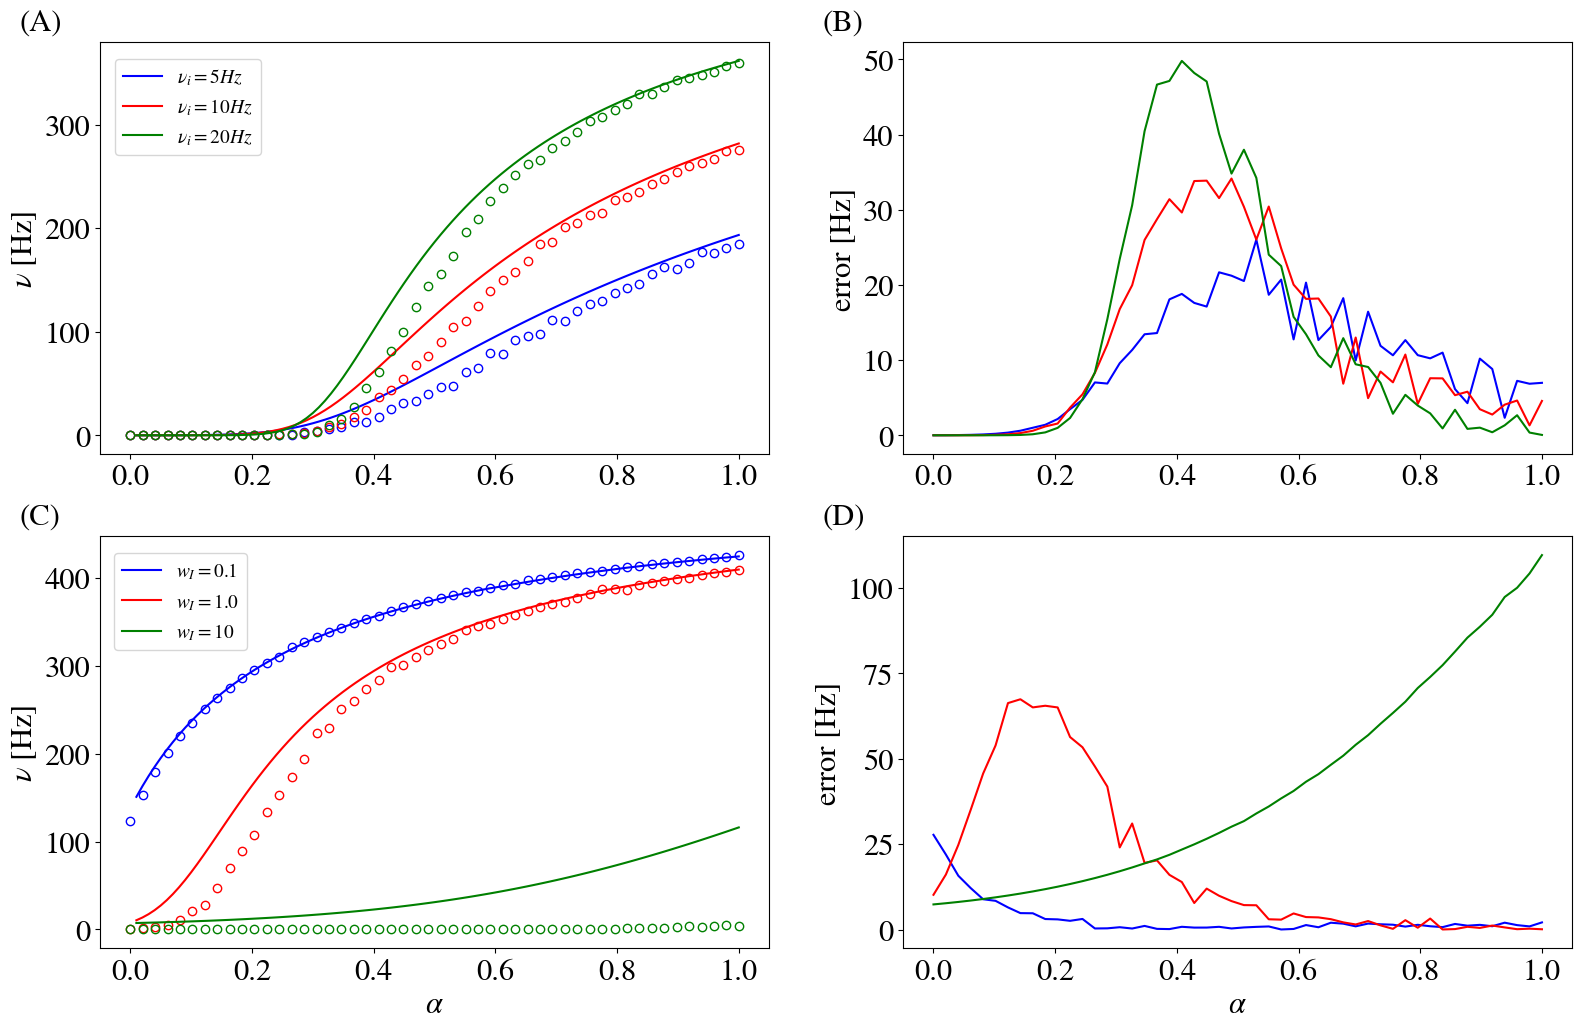

In [8]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\alpha$')
axs[1][1].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[0]]*1000, 'b-', label=r'$\nu_i = 5Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[1]]*1000, 'r-', label=r'$\nu_i = 10Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[2]]*1000, 'g-', label=r'$\nu_i = 20Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[1][0].plot(vec_alpha, df_nu_wI[vec_wI[0]]*1000, 'b-', label=r'$w_I=0.1$')
axs[1][0].plot(df_nu_wI_sim['alpha'], df_nu_wI_sim[vec_wI[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(vec_alpha, df_nu_wI[vec_wI[1]]*1000, 'r-', label=r'$w_I=1.0$')
axs[1][0].plot(df_nu_wI_sim['alpha'], df_nu_wI_sim[vec_wI[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(vec_alpha, df_nu_wI[vec_wI[2]]*1000, 'g-', label=r'$w_I=10$')
axs[1][0].plot(df_nu_wI_sim['alpha'], df_nu_wI_sim[vec_wI[2]], 'go', markerfacecolor='none')

axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[0]], 'b-')
axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[1]], 'r-')
axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[2]], 'g-')

axs[1][1].plot(df_error['alpha'], df_error_wI[vec_wI[0]], 'b-')
axs[1][1].plot(df_error['alpha'], df_error_wI[vec_wI[1]], 'r-')
axs[1][1].plot(df_error['alpha'], df_error_wI[vec_wI[2]], 'g-')
axs[0][0].legend(bbox_to_anchor=(0.24, 0.96), loc=1, borderaxespad=0., prop={'size': 14})
axs[1][0].legend(bbox_to_anchor=(0.22, 0.96), loc=1, borderaxespad=0., prop={'size': 14})


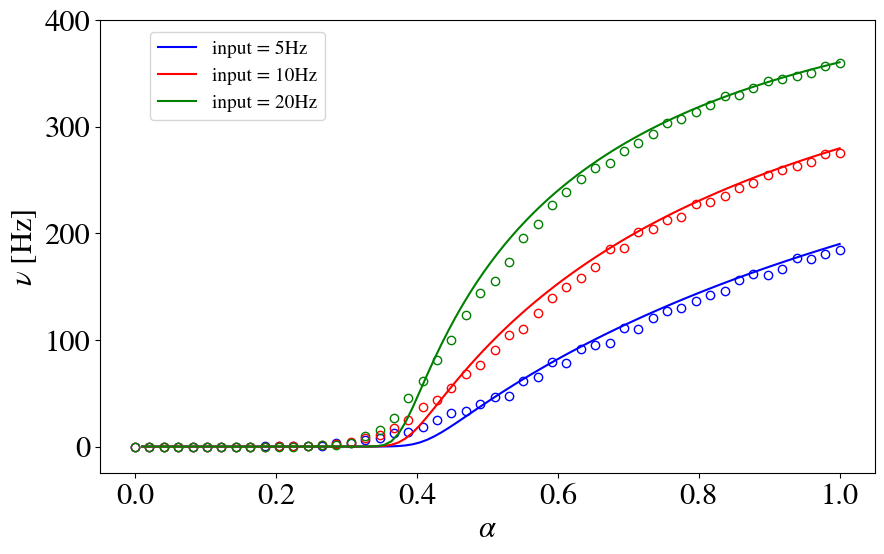

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(10,6), dpi=100, squeeze=False)
axs[0][0].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')

axs[0][0].set_ylim(-25,400)

axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[0]]*1000, 'b-', label='input = 5Hz')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['5'], 'bo', markerfacecolor='none')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['10'], 'ro', markerfacecolor='none')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['20'], 'go', markerfacecolor='none')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[1]]*1000, 'r-', label='input = 10Hz')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[2]]*1000, 'g-', label='input = 20Hz')

fig.legend(bbox_to_anchor=(0.35, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

In [3]:
n = 30000
model_type = mt.MFNMDA(alpha_val = 0.81,
					EL_val = -60,
					EA_val = 0,
					EN_val = 0,
					EI_val = -80,
					nuA_val = 0.005,
					nuN_val = 0.005,
					nuI_val = 0.005,
					wA_val = 0.5,
					wN_val = 0.5,
					wI_val = 0.1,
					tauA_val = 1,
					tauN_val = 100,
					tauI_val = 10,
					KA_val = 400,
					KN_val = 400, 
					KI_val = 100,
					Vth_val= -50,
					Vr_val = -60,
					tauL_val = 20,
					tauR_val = 2,
					beta_val = 0.062,
					gamma_val = 3.57,
					n_Mg_val = 1
				)

LV_model = mf.LangevinModel(model_type)
FP_model = mf.FokkerPlanckModel(LV_model, True)
E_I = model_type.data_parameters.values[model_type.vec_E[3]]
V_th = model_type.data_parameters.values[model_type.Vth]

vec_Vk = np.linspace(E_I, V_th, n + 1)

nu = FP_model.calculate_firing_rate(vec_Vk)

P = FP_model.integrate_p0(vec_Vk)*nu

/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  elif((-0.0001 <= 1/Bk <= 0.0001) or (-0.0001 <= 1/Hk <= 0.0001)):


0.4021555105137582

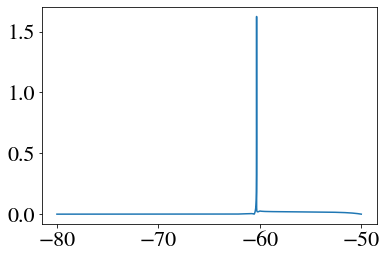

In [4]:
plt.plot(vec_Vk, P)
nu
# np.where(0.82 < vec_alpha)
# df_nu_wI[0.1][83]
# vec_alpha[83]

In [11]:
df_firing_rate_ta = pd.read_csv('firing_rate_iRate.dat', index_col=0)
df_firing_rate_ta['5'][14]

4.35

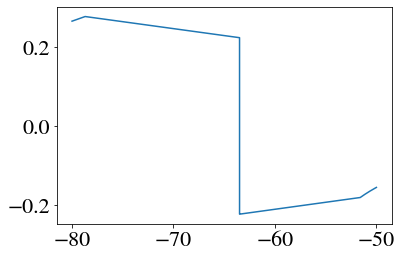

In [3]:
model_type = mt.MFNMDA(alpha_val = 0.9,
					EL_val = -60,
					EA_val = 0,
					EN_val = 0,
					EI_val = -80,
					nuA_val = 0.005,
					nuN_val = 0.005,
					nuI_val = 0.005,
					wA_val = 0.5,
					wN_val = 0.5,
					wI_val = 0.1,
					tauA_val = 1,
					tauN_val = 100,
					tauI_val = 10,
					KA_val = 400,
					KN_val = 400, 
					KI_val = 100,
					Vth_val= -50,
					Vr_val = -60,
					tauL_val = 20,
					tauR_val = 2,
					beta_val = 0.062,
					gamma_val = 3.57,
					n_Mg_val = 1
				)

vec_Vk = np.linspace(-80, -50, 30000 + 1, dtype=np.longdouble)
model = mf.LangevinModel(model_type)
integrator = mf.FokkerPlanckModel(model, True)

f = model_type.data_parameters.transform_expressions_to_functions([integrator.vec_S[1]])

plt.plot(vec_Vk, f[0](vec_Vk))